# Assignment 2

In [36]:
%store -r X
print(X)

[[18.5 19.7 22.4 ... 18.9 18.6  1. ]
 [23.7 36.3  2.2 ... 26.5 34.1  1. ]
 [18.4 27.5  0.  ... 19.7 24.4  0. ]
 ...
 [10.  20.1  0.  ... 14.3 19.   0. ]
 [ 9.9 25.3  0.  ... 14.4 24.5  0. ]
 [14.4 19.8 13.2 ... 15.4 16.6  1. ]]


In [37]:
%store -r Y
print(Y)

[1 1 1 ... 0 0 0]


In [38]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

## Default Decision Tree Classifiers
### Default Random Splits

In [39]:
for i in range(0, 15):

    #Splitting dataset matrices into training 80% and testing 20%
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

    #declare default DT classifier
    default_model = tree.DecisionTreeClassifier()

    #Training it   
    default_model.fit(X_train, y_train)

    print('(Training, Testing) Accuracy Result : ', default_model.score(X_train, y_train), ', ', default_model.score(X_test, y_test))

(Training, Testing) Accuracy Result :  1.0 ,  0.8309178743961353
(Training, Testing) Accuracy Result :  1.0 ,  0.7729468599033816
(Training, Testing) Accuracy Result :  1.0 ,  0.7971014492753623
(Training, Testing) Accuracy Result :  1.0 ,  0.7584541062801933
(Training, Testing) Accuracy Result :  1.0 ,  0.7971014492753623
(Training, Testing) Accuracy Result :  1.0 ,  0.7632850241545893
(Training, Testing) Accuracy Result :  1.0 ,  0.821256038647343
(Training, Testing) Accuracy Result :  1.0 ,  0.8309178743961353
(Training, Testing) Accuracy Result :  1.0 ,  0.7729468599033816
(Training, Testing) Accuracy Result :  1.0 ,  0.7681159420289855
(Training, Testing) Accuracy Result :  1.0 ,  0.7922705314009661
(Training, Testing) Accuracy Result :  1.0 ,  0.8067632850241546
(Training, Testing) Accuracy Result :  1.0 ,  0.7391304347826086
(Training, Testing) Accuracy Result :  1.0 ,  0.7439613526570048
(Training, Testing) Accuracy Result :  1.0 ,  0.7246376811594203


### Default K-fold cross validation

In [40]:
cv_result = cross_validate(default_model, X, Y, cv=5)

print('Fit_time / Train_time: ', cv_result['fit_time'])
print('Score_time / Test_time: ', cv_result['score_time'])
print('Test_score / Test_accuracy: ', cv_result['test_score'])

Fit_time / Train_time:  [0.00697064 0.00797319 0.01096964 0.009974   0.0060153 ]
Score_time / Test_time:  [0.00099397 0.         0.00099659 0.00099802 0.        ]
Test_score / Test_accuracy:  [0.69565217 0.77294686 0.71014493 0.7961165  0.7961165 ]


## Adjusting Hyper parameters
The default parameters that control the size of the trees will lead to fully grown and unprined trees that results in an Overfitted or Underfitted model. To reduce that we will control the parameter values. In our case we will be controlling the min_samples_split and max_depth.

### Finding the best Min_sample_split
We will find the best min_Samples_split value by training our DT fo min_Samples_split within the range of 10 - 40 and find the best value using balanced f-score metric.


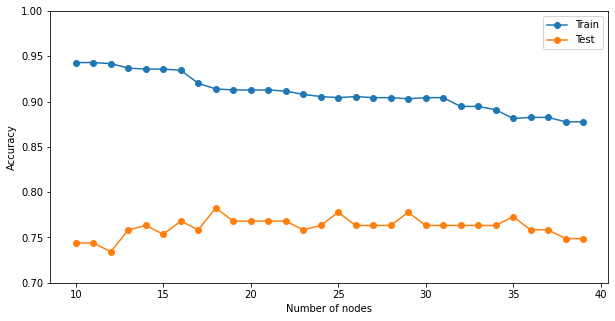

In [41]:
# define lists to collect score
train_scores, test_scores, f1_scores = list(), list(), list()

#defining min_sample_split values (number of nodes)
values = [i for i in range(10, 40)]
    
# evaluate a decision tree for each min_sample_split
for i in values:
    #creating the calssifier and adjusting the min_samples_split
    model = tree.DecisionTreeClassifier(min_samples_split=i)

    #Training it
    model.fit(X_train, y_train)

    #appending training accuracy
    train_scores.append(model.score(X_train, y_train))
    
    #appending testing accuracy
    test_scores.append(model.score(X_test, y_test))

    #Making predictions
    y_pred = model.predict(X_test)
    #appending the f1_score
    f1_scores.append(f1_score(y_test, y_pred,))
    

# plot of accuracy vs 'numbed of nodes'
plt.figure(figsize=(10,5))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')

plt.xlabel("Number of nodes")
plt.ylabel("Accuracy")

plt.axis([None, None, 0.7, 1.0])
plt.legend()
plt.show()


Explain graph plot

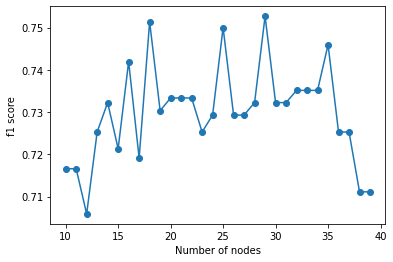

In [42]:
#plotting f1 score graph
plt.xlabel("Number of nodes")
plt.ylabel("f1 score")
plt.plot(values, f1_scores,'-o')
plt.show()

We have additionally plotted the f1_score against the number of nodes, we can see that between 35 - 40 we have the highest f1_score.

#### Based on the f1_score metric we will calculate the best min_samples_split to continue of with

In [43]:
print("Best min_sample_split value:")
max_f1_score = max(f1_scores)
index = f1_scores.index(max_f1_score)
best_min_sample_split = values[index]
print('min_Samples_split : ', best_min_sample_split)
print('f1_score : ', max_f1_score)
print('train_accuracy : ', train_scores[index])
print('testing_accuracy : ', test_scores[index])


Best min_sample_split value:
min_Samples_split :  29
f1_score :  0.7526881720430108
train_accuracy :  0.9031476997578692
testing_accuracy :  0.7777777777777778


### Finding the best Max_depth
We will find the best max_depth value by training our DT fo min_Samples_split = xx and max-depth values within the range of 1 - 10 and find the best values using balanced f-score metric.

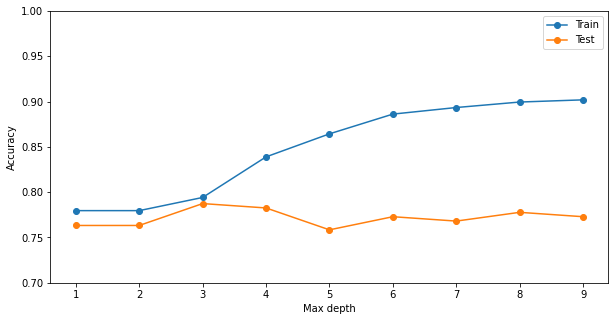

In [44]:
# define lists to collect score
train_scores, test_scores, f1_scores = list(), list(), list()

#defining max_depth values
max_depth_values = [i for i in range(1, 10)]
    
# evaluate a decision tree for each max_depth
for i in max_depth_values:
    #creating the calssifier and adjusting the min_samples_split
    adjusted_model = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=i)

    #Training it
    adjusted_model.fit(X_train, y_train)

    #appending training accuracy
    train_scores.append(adjusted_model.score(X_train, y_train))
    
    #appending testing accuracy
    test_scores.append(adjusted_model.score(X_test, y_test))

    #Making predictions
    y_pred = adjusted_model.predict(X_test)
    #appending the f1_score
    f1_scores.append(f1_score(y_test, y_pred,))
    

# plot of accuracy vs 'numbed of nodes'
plt.figure(figsize=(10,5))

plt.plot(max_depth_values, train_scores, '-o', label='Train')
plt.plot(max_depth_values, test_scores, '-o', label='Test')

plt.xlabel("Max depth")
plt.ylabel("Accuracy")

plt.axis([None, None, 0.7, 1.0])
plt.legend()
plt.show()

(explain graph)

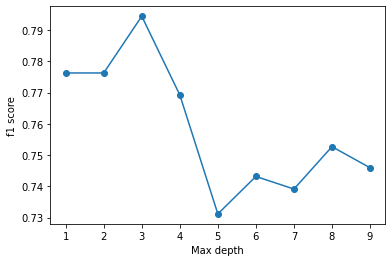

In [45]:
#plotting f1 score graph
plt.xlabel("Max depth")
plt.ylabel("f1 score")
plt.plot(max_depth_values, f1_scores,'-o')
plt.show()

We have additionally plotted the f1_score against the max_depth, we can see that between ... we have the highest f1_score.

#### Based on the f1_score metric we will calculate the best max_depth to continue of with

In [46]:
print("Best max_depth value:")
max_f1_score = max(f1_scores)
index = f1_scores.index(max_f1_score)
best_max_depth = max_depth_values[index]
print('max_dept : ', best_max_depth)
print('f1_score : ', max_f1_score)
print('train_accuracy : ', train_scores[index])
print('testing_accuracy : ', test_scores[index])

Best max_depth value:
max_dept :  3
f1_score :  0.794392523364486
train_accuracy :  0.7941888619854721
testing_accuracy :  0.7874396135265701


## Adjusted Decision Tree Classifier
### Adjusted Random Splits 

In [47]:
for i in range(0, 15):

    #Splitting dataset matrices into training 80% and testing 20%
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

    #declare default DT classifier
    adjusted_model = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=best_max_depth)

    #Training it   
    adjusted_model.fit(X_train, y_train)

    print('(Training, Testing) Accuracy Result : ', adjusted_model.score(X_train, y_train), ', ', adjusted_model.score(X_test, y_test))

(Training, Testing) Accuracy Result :  0.8123486682808717 ,  0.7536231884057971
(Training, Testing) Accuracy Result :  0.801452784503632 ,  0.7584541062801933
(Training, Testing) Accuracy Result :  0.8062953995157385 ,  0.748792270531401
(Training, Testing) Accuracy Result :  0.8038740920096852 ,  0.7294685990338164
(Training, Testing) Accuracy Result :  0.8111380145278451 ,  0.7584541062801933
(Training, Testing) Accuracy Result :  0.7929782082324455 ,  0.782608695652174
(Training, Testing) Accuracy Result :  0.7929782082324455 ,  0.7777777777777778
(Training, Testing) Accuracy Result :  0.8208232445520581 ,  0.7439613526570048
(Training, Testing) Accuracy Result :  0.7905569007263923 ,  0.782608695652174
(Training, Testing) Accuracy Result :  0.7966101694915254 ,  0.7681159420289855
(Training, Testing) Accuracy Result :  0.8002421307506054 ,  0.7391304347826086
(Training, Testing) Accuracy Result :  0.801452784503632 ,  0.7536231884057971
(Training, Testing) Accuracy Result :  0.8171

### Adjusted K-fold 

In [48]:
cv_result = cross_validate(adjusted_model, X, Y, cv=5)

print('Fit_time / Train_time: ', cv_result['fit_time'])
print('Score_time / Test_time: ', cv_result['score_time'])
print('Test_score / Test_accuracy: ', cv_result['test_score'])

Fit_time / Train_time:  [0.00350094 0.00311589 0.00262332 0.00305152 0.00498319]
Score_time / Test_time:  [0.0009954  0.         0.00093722 0.00094032 0.00101113]
Test_score / Test_accuracy:  [0.7826087  0.76328502 0.75845411 0.76213592 0.76213592]


## Plotting best fitted tree 

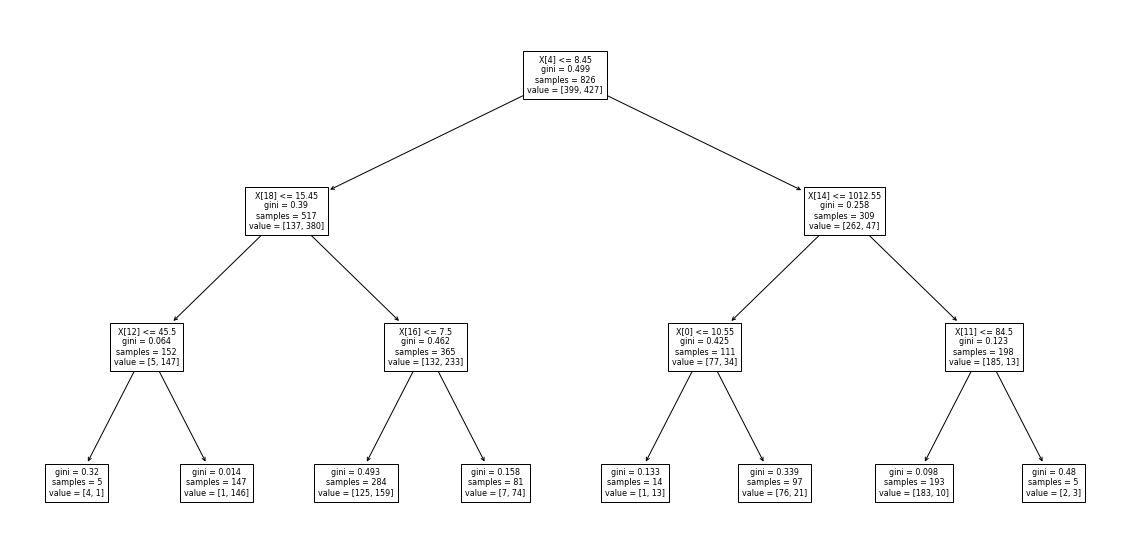

In [49]:
clf = tree.DecisionTreeClassifier(min_samples_split=best_min_sample_split, max_depth=best_max_depth)

#Training it
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(clf, fontsize=8)
plt.show()